In [1]:
import pandas as pd
import seaborn as sns
import ppscore as pps
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

In [4]:
df = pd.read_csv('dataset_colesterol.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [16]:
df.drop('Id', axis=1, inplace=True)

In [17]:
df = pd.get_dummies(df, columns=['Grupo Sanguíneo', 'Fumante', 'Nível de Atividade'])

In [18]:
df

,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
0,33.0,85.1,186.0,199.63,0,0,1,0,0,1,0,1,0
1,68.0,105.0,184.0,236.98,1,0,0,0,1,0,0,0,1
2,25.0,64.8,180.0,161.79,0,0,0,1,1,0,1,0,0
3,43.0,120.2,167.0,336.24,1,0,0,0,1,0,1,0,0
4,79.0,88.5,175.0,226.23,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31.0,68.1,166.0,206.81,0,1,0,0,0,1,0,0,1
996,51.0,47.7,170.0,128.03,0,0,0,1,1,0,1,0,0
997,39.0,85.5,176.0,211.14,0,1,0,0,1,0,0,1,0
998,61.0,91.2,161.0,284.53,0,1,0,0,0,1,0,1,0


<Axes: >

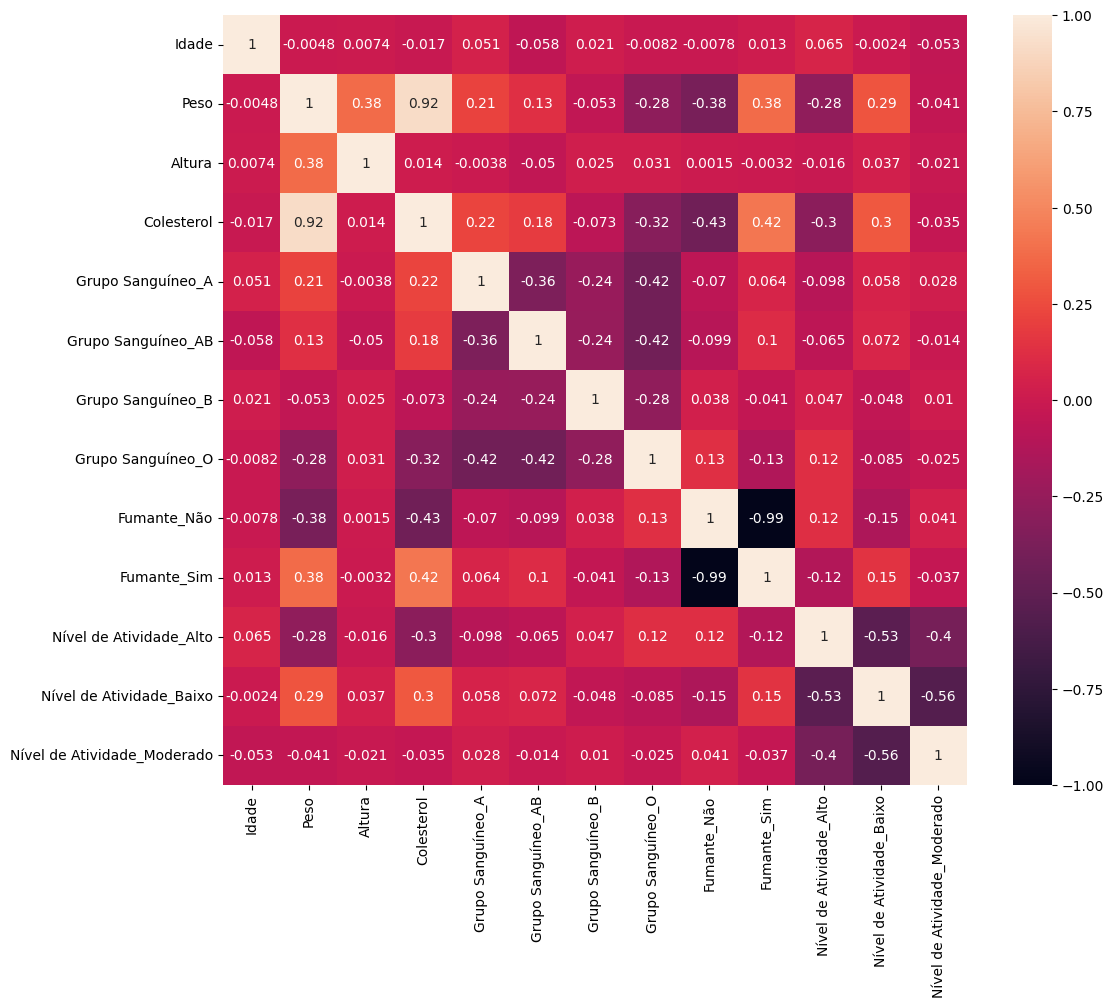

In [28]:
plt.figure(figsize=(12, 10))
sns.heatmap(data=df.corr(), annot=True, vmax=1, vmin=-1)

In [29]:
pps_matrix_reg = pps.matrix(df)

In [38]:
pps_matrix_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x               169 non-null    object 
 1   y               169 non-null    object 
 2   ppscore         169 non-null    float64
 3   case            169 non-null    object 
 4   is_valid_score  169 non-null    bool   
 5   metric          156 non-null    object 
 6   baseline_score  169 non-null    float64
 7   model_score     169 non-null    float64
 8   model           156 non-null    object 
dtypes: bool(1), float64(3), object(5)
memory usage: 10.9+ KB


In [44]:
pps_matrix_reg[pps_matrix_reg['x'] == 'Colesterol'].pivot

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
39,Colesterol,Idade,0.000000,regression,True,mean absolute error,15.089268,20.384697,DecisionTreeRegressor()
40,Colesterol,Peso,0.454666,regression,True,mean absolute error,17.000100,9.270736,DecisionTreeRegressor()
41,Colesterol,Altura,0.000000,regression,True,mean absolute error,7.693079,10.019751,DecisionTreeRegressor()
42,Colesterol,Colesterol,1.000000,predict_itself,True,None,0.000000,1.000000,None
43,Colesterol,Grupo Sanguíneo_A,0.000000,regression,True,mean absolute error,0.266000,0.377000,DecisionTreeRegressor()
44,Colesterol,Grupo Sanguíneo_AB,0.000000,regression,True,mean absolute error,0.268000,0.394500,DecisionTreeRegressor()
45,Colesterol,Grupo Sanguíneo_B,0.000000,regression,True,mean absolute error,0.139000,0.228000,DecisionTreeRegressor()
46,Colesterol,Grupo Sanguíneo_O,0.000000,regression,True,mean absolute error,0.323000,0.388500,DecisionTreeRegressor()
47,Colesterol,Fumante_Não,0.021680,regression,True,mean absolute error,0.369000,0.361000,DecisionTreeRegressor()
48,Colesterol,Fumante_Sim,0.000000,regression,True,mean absolute error,0.366000,0.369000,DecisionTreeRegressor()
